In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set()
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

infile='Bladder.txt'

testratio=32/72


df=pd.read_csv(infile,sep='\t')
df

,pCR,Age,Sex,Race,Urothelial,Smoking,NAC,MIBC,utDNA,TF99
0,0,63,1,1,1,1,1,1,2.4,2.400
1,0,78,1,1,1,0,0,1,5.9,2.400
2,0,77,1,1,0,1,1,1,2.4,1.600
3,0,61,1,1,1,1,0,1,11.6,12.900
4,0,68,1,1,1,0,0,1,10.1,0.000
...,...,...,...,...,...,...,...,...,...,...
69,1,78,2,1,1,1,0,0,26.1,8.702
70,1,56,1,1,1,1,0,0,4.7,0.000
71,1,61,1,1,1,0,1,0,0.0,0.000
72,1,73,2,1,1,1,1,1,0.3,0.000


In [2]:
df1 = df.copy()
df1['Sum'] = np.multiply(np.array(df['utDNA']) + np.array(df['TF99']), np.array(df['Age']))
df1 = df.drop(['utDNA', 'TF99', 'Age'], axis=1)

df2 = df.copy()
df2['Diff'] = np.multiply(np.array(df['utDNA']) - np.array(df['TF99']), np.array(df['Age']))
df2 = df.drop(['utDNA', 'TF99', 'Age'], axis=1)

df3 = df.copy()
df3['Multi'] = np.divide(np.array(df['utDNA']) + np.array(df['TF99']), np.array(df['Age']))
df3 = df.drop(['utDNA', 'TF99', 'Age'], axis=1)

df4 = df.copy()
df4['Div'] = np.divide(np.array(df['utDNA']) - np.array(df['TF99']), np.array(df['Age']))
df4 = df.drop(['utDNA', 'TF99', 'Age'], axis=1)


In [3]:
Xs = []
Ys = []

dfs = [df1, df2, df3, df4]
for df_val in dfs:
    X=df_val.drop(['pCR'],axis=1)
    Y=df_val["pCR"].copy()
    Xs.append(X)
    Ys.append(Y)

In [4]:
trainXs = []
testXs = []
trainYs = []
testYs = []
for i in range(len(Xs)):
    X_arr = Xs[i]
    Y_arr = Ys[i]
    trainX,testX,trainY,testY =  train_test_split(X_arr,Y_arr,test_size=testratio, random_state=0)
    trainXs.append(trainX)
    testXs.append(testX)
    trainYs.append(trainY)
    testYs.append(testY)

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, auc
for i in range(len(trainXs)):
    trainX_arr = trainXs[i]
    trainY_arr = trainYs[i]
    testX_arr = testXs[i]
    testY_arr = testYs[i]
    my_final_classifier = RandomForestClassifier(oob_score=True,n_estimators=2000)
    my_final_classifier.fit(trainX_arr, trainY_arr)
    pred = my_final_classifier.predict_proba(testX_arr)[:,1]
    pred_train = my_final_classifier.predict_proba(trainX_arr)[:,1]
    pred_all = my_final_classifier.predict_proba(trainX_arr.append(testX_arr))[:,1]

    print('Oob_score =', my_final_classifier.oob_score_)
    print('ROC Score =', roc_auc_score(testY_arr, my_final_classifier.predict_proba(testX_arr)[:,1]))
    
    fpr, tpr, thresholds = roc_curve(testY_arr, pred)
    sens_pred = tpr
    spec_pred = 1 - fpr
    gmeans = np.sqrt(tpr * (1-fpr))
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]), '\n')
    
    fpr_train, tpr_train, thresholds_train = roc_curve(trainY_arr, pred_train)
    sens_train = tpr_train
    spec_train = 1 - fpr_train
    gmeans_train = np.sqrt(sens_train * spec_train)
    ix_train = np.argmax(gmeans_train)
    
    fpr_all, tpr_all, thresholds_all = roc_curve(trainY_arr.append(testY_arr), pred_all)
    sens_all = tpr_all
    spec_all = 1 - fpr_all
    gmeans_all = np.sqrt(sens_all * spec_all)
    ix_all = np.argmax(gmeans_all)
    
    df_ss = pd.DataFrame([[sens_pred[ix], spec_pred[ix]], [sens_train[ix_train], spec_train[ix_train]], [sens_all[ix_all], spec_all[ix_all]]],\
                         columns=['Sensitivity', 'Specificity'], index=['Test', 'Train', 'All'])
    display(df_ss)

Oob_score = 0.6097560975609756
ROC Score = 0.8333333333333334
Best Threshold=0.383834, G-Mean=0.821 



,Sensitivity,Specificity
Test,0.809524,0.833333
Train,0.866667,0.769231
All,0.833333,0.789474


Oob_score = 0.6097560975609756
ROC Score = 0.8333333333333334
Best Threshold=0.343508, G-Mean=0.821 



,Sensitivity,Specificity
Test,0.809524,0.833333
Train,0.866667,0.769231
All,0.833333,0.789474


Oob_score = 0.6097560975609756
ROC Score = 0.8333333333333333
Best Threshold=0.351752, G-Mean=0.821 



,Sensitivity,Specificity
Test,0.809524,0.833333
Train,0.866667,0.769231
All,0.833333,0.789474


Oob_score = 0.6341463414634146
ROC Score = 0.8333333333333334
Best Threshold=0.361666, G-Mean=0.821 



,Sensitivity,Specificity
Test,0.809524,0.833333
Train,0.866667,0.769231
All,0.833333,0.789474


In [6]:
my_final_classifier.oob_score_

0.6341463414634146

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

roc_auc_score(testY, my_final_classifier.predict_proba(testX)[:,1])

0.8333333333333334

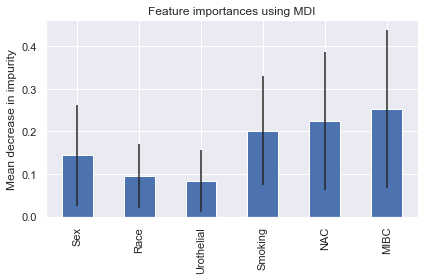

In [8]:
feature_names = X.columns
std = np.std([tree.feature_importances_ for tree in my_final_classifier.estimators_], axis=0)
importances = my_final_classifier.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [9]:
feature_names

Index(['Sex', 'Race', 'Urothelial', 'Smoking', 'NAC', 'MIBC'], dtype='object')

In [10]:
X

,Sex,Race,Urothelial,Smoking,NAC,MIBC
0,1,1,1,1,1,1
1,1,1,1,0,0,1
2,1,1,0,1,1,1
3,1,1,1,1,0,1
4,1,1,1,0,0,1
...,...,...,...,...,...,...
69,2,1,1,1,0,0
70,1,1,1,1,0,0
71,1,1,1,0,1,0
72,2,1,1,1,1,1
